In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import gensim
from nltk.data import find
import nltk

nltk.download("word2vec_sample")

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     /home/alyydi/nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

In [56]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [57]:
def get_word2vec_embedding(words):
    word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
    model = gensim.models.KeyedVectors.load_word2vec_format(
        word2vec_sample, binary=False
    )
    
    output = []
    word_pass = []
    for word in words:
        try:
            output.append(np.array(model.word_vec(word)))
            word_pass.append(word)
        except:
            pass
        
    embeddings = np.array(output)
    del model
    return embeddings, word_pass

In [58]:
def plot_attention_weight_matrix(weight_matrix, x_ticks, y_ticks):
    """Function that takes in a weight matrix and plots it with custom axis ticks"""
    plt.figure(figsize=(15, 7))
    ax = sns.heatmap(weight_matrix, cmap="Blues")
    plt.xticks(np.arange(weight_matrix.shape[1]) + 0.5)
    plt.yticks(np.arange(weight_matrix.shape[0]) + 0.5)
    plt.title("Attention matrix")
    plt.xlabel("Attention score")
    plt.show()

In [59]:
def embed_sentence(sentence):
    # Embed a sentence using word2vec; for example use cases only.
    sentence = re.sub(r"[^\w\s]", "", sentence)
    words = sentence.split()
    word_vector_sequence, words = get_word2vec_embedding(words)
    return np.expand_dims(word_vector_sequence, axis=-1), words

![alt text](./scaled_self_attention.png "Title")

In [60]:

def scaled_dot_product_attention(query, key, value):
    d_k = key.shape[-1]
    logits = np.matmul(query, np.swapaxes(key, -2, -1))
    scaled_logits = logits / np.sqrt(d_k)
    attention_weights = softmax(scaled_logits)
    value = np.matmul(attention_weights, value)
    return value, attention_weights

In [61]:
sentence = "I drink coke, but eat steak"
word_embeddings, words = embed_sentence(sentence)
word_embeddings.shape

/tmp/ipykernel_701310/108808012.py:11: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  output.append(np.array(model.word_vec(word)))


(6, 300, 1)

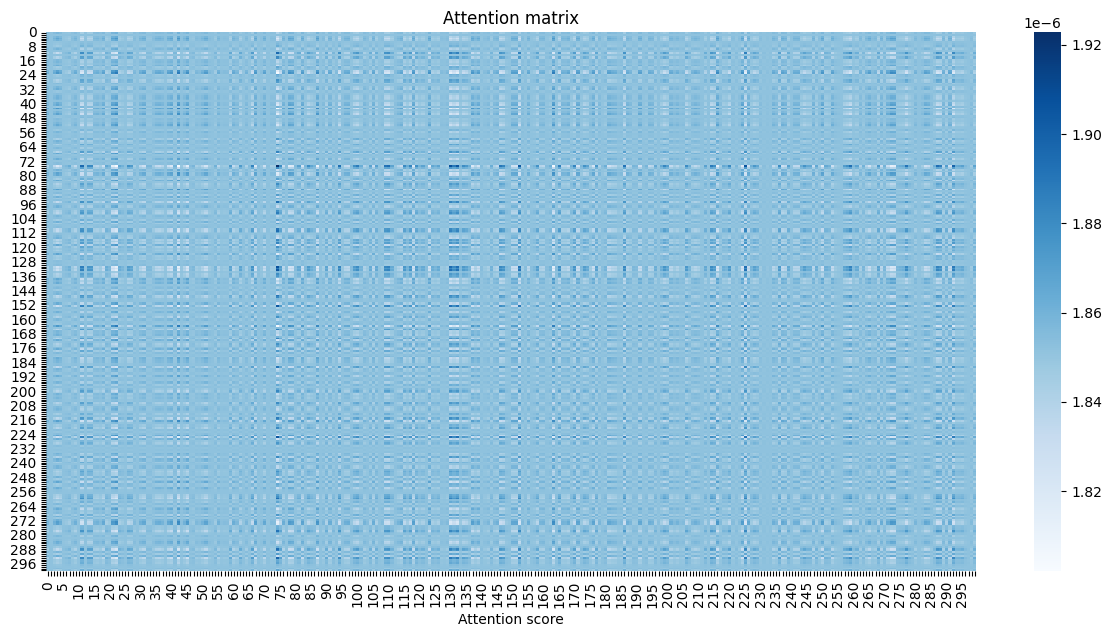

In [62]:
Q = K = V = word_embeddings

# calculate weights and plot
values, attention_weights = scaled_dot_product_attention(Q, K, V)
words = re.sub(r"[^\w\s]", "", sentence).split()
plot_attention_weight_matrix(attention_weights[0], words, words)